<a href="https://colab.research.google.com/github/Ali2098-bit/A1-PHY6000/blob/main/Spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spectrum**

Demo code to interpolate and multiply PCE and irradiance spectra in order to calculate current output of different solar cell technologies.

A Buckley

First authored: 2020/05/01

Last update: 2020/09/07

Install relevant python libraries

In [ ]:
!pip install numpy scipy pandas>1.0 matplotlib

Import relavent modules

In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

**Create interpolation function**

Takes a csv spectrum file (input spectrum) with one row header and two columns (columns are "wavelength" in nm and "power") and interpolates with fixed "step_wl"  wavelength step. 

wl stands for wavelength. x is wavelength axis and y is power axis. 
a cubic spline is chosen

The interpolation function operates on independent x and y 1D arrays so the first thing to do is split the data frame into these arrays by deleting the other column from the data frame. They then need converting to a 1D array using ".ravel()"

Then the new x variable can be defined as int_x by taking a equal step from the start wavelength "start_wl" to the end wavelength "end_wl". 

A function "f" is fitted using the spline method for all x and y.
Then a new set of y (int_y) are created using the new x values (int_x) and the function "f"

Finally the new x and y values (int_x, int_y) are added to a new dataframe "df"
I have no idea why "axis=-1" is needed!

First define the function and the inputs (start_wavelength, end_wavelength, step size in nm, input spectrum file dataframe)

In [ ]:
def interpolate_wl_spectrum(start_wl, end_wl, step_wl, input_spectrum):
    conv_spectrum = input_spectrum.values
    #converting matrix columns to 1d array
    x = np.delete(conv_spectrum,[1],axis=1)
    y = np.delete(conv_spectrum,[0],axis=1)
    #converting to 1D array
    x = x.ravel()
    y = y.ravel()
    int_x = np.linspace(start_wl, end_wl, (end_wl-start_wl+1))
    f = interp1d(x, y, kind='cubic')
    int_y = f(int_x)
    df = pd.DataFrame(np.stack((int_x, int_y), axis=-1))
    return df

**Create main function to analyse the interpolated data**
This code loads both an AM1.5 spectrum and a sparsely sampled EQE spectrum from a public github repository and interpolates both spectra to a 1nm spacing. 

With these two interpolated spectra it should be easy enough to convert the AM1.5 spectrum to a photon flux and multiple by the EQE spectrum and finally sum to get a short circuit current density. By loading different EQE spectra from different solar cells a comparison can be made.

Note that to load different EQE spectra you will need to save your own EQE spectra to your own github repository and alter the URL that loads the data.

First define the main routine. 
Second load the AM1.5 and EQE sdpectra from githib into dataframes

In [ ]:
URL_AM15 = "https://raw.githubusercontent.com/alastairbuckley/PHY6000/master/AM15_G_raw.csv"
URL_EQE = "https://raw.githubusercontent.com/alastairbuckley/PHY6000/master/eqe_spectrum.csv"
AM15_spectrum = pd.read_csv(URL_AM15, sep = ',' , header = 1)
eqe_spectrum = pd.read_csv(URL_EQE, sep = ',' , header = 1)    

Define the start and end wavelengths of the interpolation function should operate over. This should be inside the range of both sets of data. Some manual padding of the EQE data might be needed.

In [ ]:
start_wl = 300
end_wl = 2000
step_wl = end_wl-start_wl

Interpolate the AM1.5 spectrum and plot. For some reason i needed to add another index "A". but i don't really know why!

You will need to convert this to a photon flux spectrum

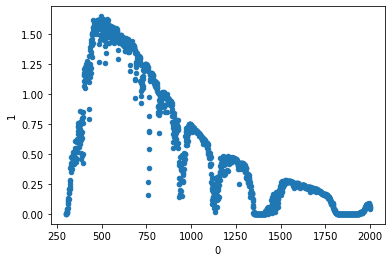

In [ ]:
AM15int = interpolate_wl_spectrum(start_wl=start_wl, end_wl=end_wl, step_wl=step_wl, input_spectrum = AM15_spectrum)
AM15int['A'] = list(range(len(AM15int.index)))
AM15int.plot.scatter(x=0, y=1)
plt.show()

Interpolate the EQE spectrum and plot

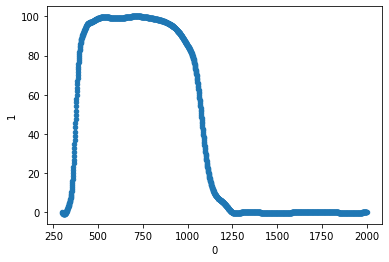

In [ ]:
EQEint = interpolate_wl_spectrum(start_wl=start_wl, end_wl=end_wl, step_wl=step_wl, input_spectrum = eqe_spectrum)
EQEint['A'] = list(range(len(EQEint)))
EQEint.plot.scatter(x=0, y=1)
plt.show()

You should now be able to multiply the EQE spectrum and the AM1.5 photon flux together to create an electron flux spectrum. by multiplying by the charge on an electron you can convert this to a current.